In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams ['figure.figsize']=10,6

In [3]:
# importing data file
dataset=pd.read_csv("AirPassengers.csv")
dataset.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
# convert data into datewise format
dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexedDataset=dataset.set_index(["Month"])

In [10]:
# INDEX data from firstdate to lastdate
from datetime import datetime
indexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


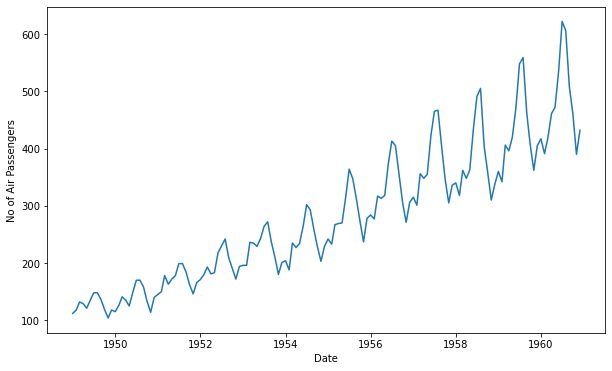

In [11]:
# always firsttask in timeseries forecasting is to plot the data
plt.xlabel("Date") 
plt.ylabel("No of Air Passengers")
plt.plot(indexedDataset)

In [13]:
# findout rolling mean and standard deviation
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


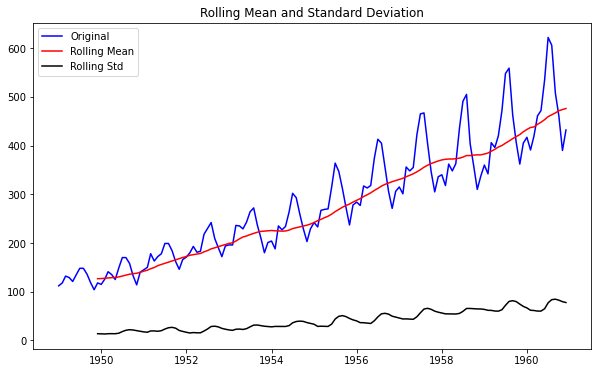

In [14]:
#display rolling mean and standard deviation along with original data - always 3rd step in TS
Ori=plt.plot(indexedDataset,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc="best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

In [17]:
# Perform Dicky Fuller Test (Unitroot test used to check stationarity of the data) Always 4th Step
from statsmodels.tsa.stattools import adfuller
print("Results of Dicky-Fuller Test:")
dftest=adfuller(indexedDataset["#Passengers"],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['test Statistic','p value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]=value
print(dfoutput)
# Ho = the time series data is non stationary
# As the p value is more than 0.05 , we accept the null hypothesis and can say that the TSD is non stationar


Results of Dicky-Fuller Test:
test Statistic                   0.815369
p value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [ ]:
indexDataset_logscale=np.log(indexedDataset)
plt.plot